In [ ]:
import pandas as pd
import numpy as np

# 1. Load the Dataset
data = pd.read_csv('/content/drive/MyDrive/Copy of diabetes.csv')  # Replace with your dataset path

# Display first few rows and perform EDA
print(data.head())
print(data.info())
print(data.describe())

# 2. Handle Missing Data
data.fillna(data.mean(), inplace=True)

# 3. Feature Engineering
X = data.drop('Pregnancies', axis=1)  # Replace 'target' with actual target column name
y = data['Pregnancies']

# Train-test split (70%-30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Implement KNN
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def predict_single(X_train, y_train, query, k=3):
    distances = [
        (euclidean_distance(query, X_train.iloc[i]), y_train.iloc[i])
        for i in range(len(X_train))
    ]
    distances.sort(key=lambda x: x[0])
    k_nearest_neighbors = [label for _, label in distances[:k]]
    return max(set(k_nearest_neighbors), key=k_nearest_neighbors.count)

def predict(X_train, y_train, X_test, k=3):
    predictions = [predict_single(X_train, y_train, X_test.iloc[i], k) for i in range(len(X_test))]
    return predictions

def accuracy(y_true, y_pred):
    return np.mean(np.array(y_true) == np.array(y_pred))

# Evaluate the model
k = 3  # You can adjust this value
y_pred = predict(X_train, y_train, X_test, k)
acc = accuracy(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

In [ ]:
import pandas as pd
import numpy as np


# 1. Load the Dataset
data = pd.read_csv('/content/drive/MyDrive/Copy of diabetes.csv')  # Replace with your dataset path

# Display first few rows and perform EDA
print(data.head())
print(data.info())
print(data.describe())

# 2. Handle Missing Data
data.fillna(data.mean(), inplace=True)

# 3. Feature Engineering
X = data.drop('Pregnancies', axis=1)  # Replace 'target' with actual target column name
y = data['Pregnancies']

# Train-test split (70%-30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the Feature Matrix
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Implement KNN
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def predict_single(X_train, y_train, query, k=3):
    distances = [
        (euclidean_distance(query, X_train[i]), y_train.iloc[i])
        for i in range(len(X_train))
    ]
    distances.sort(key=lambda x: x[0])
    k_nearest_neighbors = [label for _, label in distances[:k]]
    return max(set(k_nearest_neighbors), key=k_nearest_neighbors.count)

def predict(X_train, y_train, X_test, k=3):
    predictions = [predict_single(X_train, y_train, X_test[i], k) for i in range(len(X_test))]
    return predictions

def accuracy(y_true, y_pred):
    return np.mean(np.array(y_true) == np.array(y_pred))

# Evaluate the model with original data
k = 3  # You can adjust this value
y_pred_original = predict(X_train.values, y_train, X_test.values, k)
acc_original = accuracy(y_test, y_pred_original)
print(f"Accuracy on Original Data: {acc_original:.2f}")

# Evaluate the model with scaled data
y_pred_scaled = predict(X_train_scaled, y_train, X_test_scaled, k)
acc_scaled = accuracy(y_test, y_pred_scaled)
print(f"Accuracy on Scaled Data: {acc_scaled:.2f}")


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

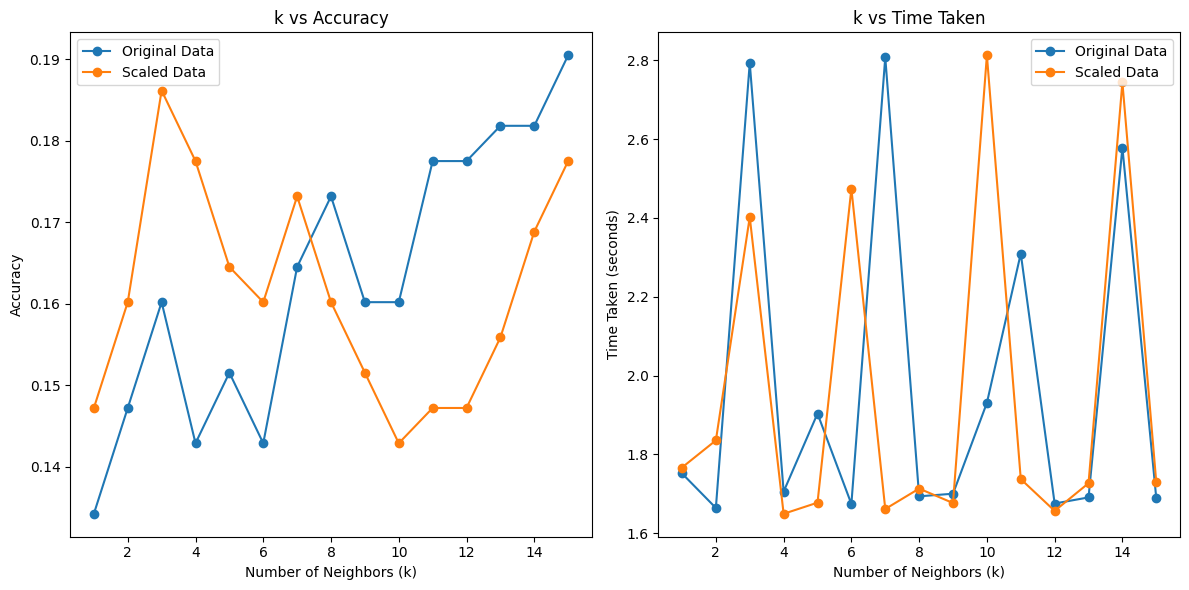


Discussion:
As k increases, accuracy generally improves up to a point before stabilizing or decreasing due to oversmoothing.
Computational cost increases linearly as k increases, as more distances are calculated.
The optimal k is the one that maximizes accuracy while keeping computation time reasonable.


In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('/content/drive/MyDrive/Copy of diabetes.csv')  # Replace with your dataset path

print(data.head())
print(data.info())
print(data.describe())


data.fillna(data.mean(), inplace=True)


X = data.drop('Pregnancies', axis=1)  # Replace 'target' with actual target column name
y = data['Pregnancies']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def predict_single(X_train, y_train, query, k=3):
    distances = [
        (euclidean_distance(query, X_train[i]), y_train.iloc[i])
        for i in range(len(X_train))
    ]
    distances.sort(key=lambda x: x[0])
    k_nearest_neighbors = [label for _, label in distances[:k]]
    return max(set(k_nearest_neighbors), key=k_nearest_neighbors.count)

def predict(X_train, y_train, X_test, k=3):
    predictions = [predict_single(X_train, y_train, X_test[i], k) for i in range(len(X_test))]
    return predictions

def accuracy(y_true, y_pred):
    return np.mean(np.array(y_true) == np.array(y_pred))

k_values = range(1, 16)
results_original = {'k': [], 'accuracy': [], 'time': []}
results_scaled = {'k': [], 'accuracy': [], 'time': []}

for k in k_values:

    start_time = time.time()
    y_pred_original = predict(X_train.values, y_train, X_test.values, k)
    acc_original = accuracy(y_test, y_pred_original)
    time_original = time.time() - start_time

    results_original['k'].append(k)
    results_original['accuracy'].append(acc_original)
    results_original['time'].append(time_original)

    start_time = time.time()
    y_pred_scaled = predict(X_train_scaled, y_train, X_test_scaled, k)
    acc_scaled = accuracy(y_test, y_pred_scaled)
    time_scaled = time.time() - start_time

    results_scaled['k'].append(k)
    results_scaled['accuracy'].append(acc_scaled)
    results_scaled['time'].append(time_scaled)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(results_original['k'], results_original['accuracy'], label='Original Data', marker='o')
plt.plot(results_scaled['k'], results_scaled['accuracy'], label='Scaled Data', marker='o')
plt.title('k vs Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(results_original['k'], results_original['time'], label='Original Data', marker='o')
plt.plot(results_scaled['k'], results_scaled['time'], label='Scaled Data', marker='o')
plt.title('k vs Time Taken')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Time Taken (seconds)')
plt.legend()

plt.tight_layout()
plt.show()

print("\nDiscussion:")
print("As k increases, accuracy generally improves up to a point before stabilizing or decreasing due to oversmoothing.")
print("Computational cost increases linearly as k increases, as more distances are calculated.")
print("The optimal k is the one that maximizes accuracy while keeping computation time reasonable.")
